# Credit Scoring for P2P Lending
<br>
Name : Ilham Zulfikri Firdaus <br>
E-mail : ilham.zulfikri.f@mail.ugm.ac.id

# Load Data

In [199]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
dataset = pd.read_csv('./dataset/loan_final313.csv')

In [2]:
dataset.head(10)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster
5,1075269,2011,01/12/2011,1012015,3.0,RENT,1,Low,36000,1,...,0,7.90,A,1,11.20,5631.377753,5000.00,0.00,156.46,munster
6,1069639,2011,01/12/2011,1012016,8.0,RENT,1,Low,47004,1,...,0,15.96,C,3,23.51,8136.840000,5110.85,0.00,170.08,leinster
7,1072053,2011,01/12/2011,1012015,9.0,RENT,1,Low,48000,1,...,0,18.64,E,5,5.35,3938.144334,3000.00,0.00,109.43,ulster
8,1071795,2011,01/12/2011,1042012,4.0,OWN,2,Low,40000,1,...,1,21.28,F,6,5.55,646.020000,162.02,189.06,152.39,ulster
9,1071570,2011,01/12/2011,1112012,0.5,RENT,1,Low,15000,1,...,1,12.69,B,2,18.08,1476.190000,673.48,269.29,121.45,munster


# Feature Analysis

These are the features presented in dataset.
- id : unique identifier for each contract (it's ambiguous, I thought it was unique identifier for requestor).
- year : the year when the contract requested.
- issue_d : the date when the contract issued
- final_d : the date when the contract finished / defaulted
- emp_length_int : the employement length, ranging from 0 to 10. 0 means 1 year or less and 10 means 10 year or more.
- home_ownership : the home ownership type (whether it's mortgage, own, rent, etc.)
- annual_inc : borrower annual income (it might refer to the company who borrow the loan)
- loan_amount : the loan requested
- term : the term request
- application_type : the application type (e.g. individual or join)
- purpose : the loan purpose (e.g. credit card, debt consolidation, etc.)
- interest_payments : the payment interest level (e.g. high or low)
- loan_condition : credit scoring flag
- interest_rate : the numerical interest rate choosen by the requestor
- grade : credit scoring grade
- dti : debt to income ratio (it might contain another debt)
- total_pymnt : Total money paid by the borrower. it includes interest.
- total_rec_prncp : Total principile received by the borrower, it might be lower the loan amount requested (but it never be greater).
- recoveries : The money recovered from the borrower, if the borrower defaulted.
- installment : the amount of money should be paid by the customer every month.
- region : the region where the customer came from.
<br><br>
NOTE:<br>
There are additional features which represent the categorical  form of existing feature. this additional feature are named like this ,
<br><br>
NameOfFeature_cat


## Data Insight

### Company Growth

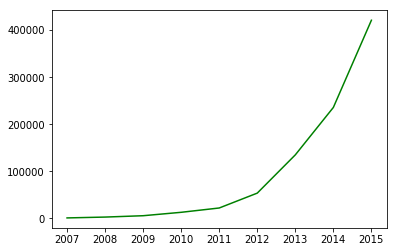

In [3]:
dataset['year'].value_counts().plot.line(color='g')

### Bad vs Good Loan Proportion

Visualize the proportion between bad and good loan declared in this P2P lending.

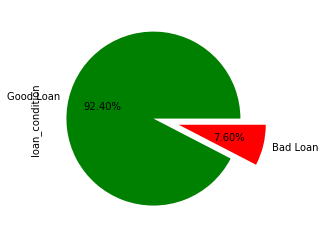

In [4]:
dataset['loan_condition'].value_counts().plot.pie(explode=[0,0.3],autopct='%1.2f%%', colors=['g','r'])

### Employement Length

The goal for this analysis is, whether or not the employement have an impact to the loan condition.

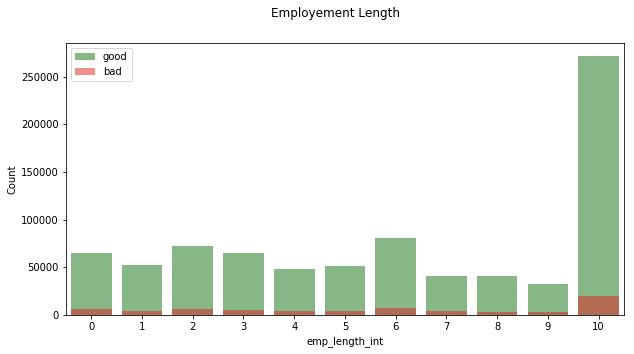

In [207]:
import seaborn as sns

dataset['emp_length_int'] = dataset['emp_length_int'].astype(int)
test = dataset.groupby(["loan_condition", "emp_length_int"]).size().reset_index(name='Count')

fig = plt.figure(figsize = (10, 5))
sns.barplot(test[test['loan_condition']=='Good Loan'].iloc[:,1],test[test['loan_condition']=='Good Loan'].iloc[:,2],alpha=0.5, color='g', label = 'good')
sns.barplot(test[test['loan_condition']=='Bad Loan'].iloc[:,1],test[test['loan_condition']=='Bad Loan'].iloc[:,2],alpha=0.5, color='r', label = 'bad')
plt.legend(loc='best')
fig.suptitle('Employement Length')
plt.show()

That chart is not insightful, every employement length category has different good and bad proportion. I dont see any pattern on that chart. Let's see if we can see some patern with rationing good and bad on each of employement length category.

$$\left(\frac{\sum_{j=0}^{n}bad_{j}}{\sum_{j=0}^{n}bad_{j}+\sum_{i=0}^{n}good_{i}}\right) _{emp\_length\_int}$$

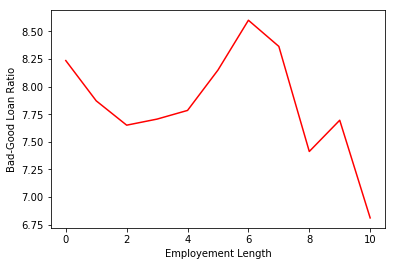

In [208]:
test['Count_percentage'] = test.iloc[:,1:].groupby(['emp_length_int']).apply(lambda x:100 * x / float(x.sum()))
test[test['loan_condition']=='Bad Loan']['Count_percentage'].plot.line(color='r')
plt.ylabel('Bad-Good Loan Ratio')
plt.xlabel('Employement Length')
plt.show()

I can see a pattern on this chart. The greater the employement length, the lower ratio of bad loan. even though it has overshoot on 6, but still the overall ratio of bad loan wil go down with the increasing of employement length.

### Annual Income

I want to see whether or not the annual income will affect the loan condition. First, I want to see the data distribution with boxplot.

No handles with labels found to put in legend.


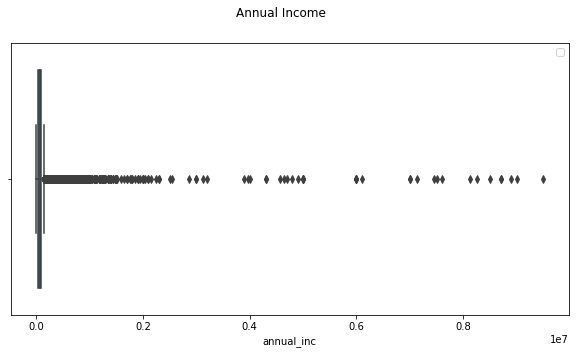

In [7]:
fig = plt.figure(figsize = (10, 5))
sns.boxplot(dataset['annual_inc'])
plt.legend(loc='best')
fig.suptitle('Annual Income')
plt.show()

BOOM! there are lot of outlier.<br><br>So, I did something different. I split the annual income into several non-uniform bins (0,50000,75000,...). I did this to make the chart more representative (since there are lot of outlier for annual income greater than $250,000)

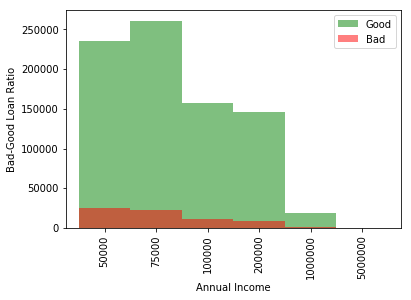

In [203]:
#annual income vs loan condition
import numpy as np
good = dataset[dataset['loan_condition']=='Good Loan']['annual_inc']
bad = dataset[dataset['loan_condition']=='Bad Loan']['annual_inc']
# Create non-uniform bins.  Unit in dollar.
bins = [0,50000,75000,100000,200000,1000000,5000000]

# Get histogram of data
good_y, x = np.histogram(good, bins=bins)
bad_y, x = np.histogram(bad, bins=bins)
x=x[1:]

# Turn into pandas Series
good_bar = pd.Series(good_y, x)
bad_bar = pd.Series(bad_y, x)
# Plot
good_bar.plot(kind='bar',color='g', width=1, alpha=0.5, align='center')
bad_bar.plot(kind='bar',color='r', width=1, alpha=0.5, align='center')
plt.legend(['Good','Bad'])
plt.ylabel('Bad-Good Loan Ratio')
plt.xlabel('Annual Income')
plt.show()

We see here that the majority of borrower only has income below 100 thousands dollar. But still, I don't see any promising pattern here. I will use previous approach, ratio between good and bad loan on every annual income category.

$$\left(\frac{\sum_{j=0}^{n}bad_{j}}{\sum_{j=0}^{n}bad_{j}+\sum_{i=0}^{n}good_{i}}\right) _{annual\_inc\_category}$$

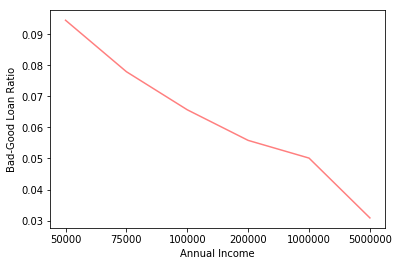

In [204]:
# Turn into pandas DataFrame

good_bar = pd.DataFrame({'loan_condition' :np.array(['Good Loan']*len(x)).astype('object'),
                         'bin': x,
                         'Count': good_y,})
bad_bar = pd.DataFrame({'loan_condition' :np.array(['Bad Loan']*len(x)).astype('object'),
                        'bin': x,
                        'Count': bad_y,})
merge_bar = pd.concat([good_bar,bad_bar]).reset_index(drop=True)
merge_bar['Count_percentage'] = merge_bar.groupby('bin')['Count'].apply(lambda x: x.astype(float)/x.sum())

ax = merge_bar[merge_bar['loan_condition']=='Bad Loan'].Count_percentage.plot(kind='line',color='r', alpha=0.5)
ax.set_xticklabels(bins)
plt.ylabel('Bad-Good Loan Ratio')
plt.xlabel('Annual Income')
plt.show()

The greater the annual income, the lower ratio of bad loan vs good loan. It makes sense, since the greater annual income means the borrower have a greater chance to paid up the loan.

### Loan Amount

Using the same method as before, I split the loan amount into 50 uniform bin and make the scatter plot from it.

C:\Users\ilham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


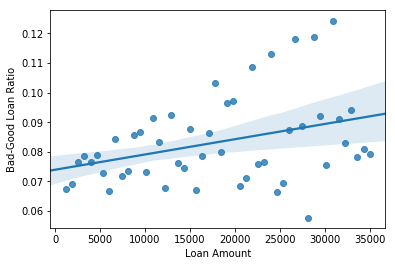

In [200]:
#loan ammount vs loan condition
good = dataset[dataset['loan_condition']=='Good Loan']['loan_amount']
bad = dataset[dataset['loan_condition']=='Bad Loan']['loan_amount']

good_y, x = np.histogram(good, bins=50)
bad_y, x = np.histogram(bad, bins=x)
x=x[1:]

# Turn into pandas DataFrame
good_bar = pd.DataFrame({'loan_condition' :np.array(['Good Loan']*len(x)).astype('object'),
                         'bin': x,
                         'Count': good_y,})
bad_bar = pd.DataFrame({'loan_condition' :np.array(['Bad Loan']*len(x)).astype('object'),
                        'bin': x,
                        'Count': bad_y,})
merge_bar = pd.concat([good_bar,bad_bar]).reset_index(drop=True)

merge_bar['Count_percentage'] = merge_bar.groupby('bin')['Count'].apply(lambda x: x.astype(float)/x.sum())

#merge_bar[merge_bar['loan_condition']=='Bad Loan'][['bin','Count_percentage']].set_index('bin').plot.line(color='r')

sns.regplot(merge_bar[merge_bar['loan_condition']=='Bad Loan']['bin'],merge_bar[merge_bar['loan_condition']=='Bad Loan']['Count_percentage'])
plt.ylabel('Bad-Good Loan Ratio')
plt.xlabel('Loan Amount')
plt.show()

You can see the regression line shows the pattern that the greater loan amount the lower ratio of bad loan vs good loan.

### Income Level vs Loan Requested

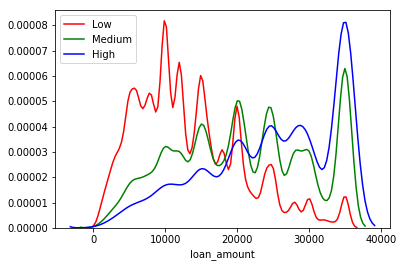

In [11]:

sns.distplot(dataset[dataset['income_category']=='Low']['loan_amount'], color='r', label = 'Low',hist=False)
sns.distplot(dataset[dataset['income_category']=='Medium']['loan_amount'], color='g', label = 'Medium',hist=False)
sns.distplot(dataset[dataset['income_category']=='High']['loan_amount'], color='b', label = 'High',hist=False)


from distribution chart above, we can see that the High Level Income tend to take Higher Loan. The lower the income tend to take the lower loan.

### Home Ownership

Show the home ownership count for each of loan condition.

In [228]:
#Homeownership vs loan condition
test = dataset.groupby(["loan_condition", "home_ownership"]).size().reset_index(name='Count')
test

,loan_condition,home_ownership,Count
0,Bad Loan,MORTGAGE,29699
1,Bad Loan,NONE,8
2,Bad Loan,OTHER,38
3,Bad Loan,OWN,6293
4,Bad Loan,RENT,31391
5,Good Loan,ANY,3
6,Good Loan,MORTGAGE,413858
7,Good Loan,NONE,42
8,Good Loan,OTHER,144
9,Good Loan,OWN,81177


Visualize the table into bar chart.

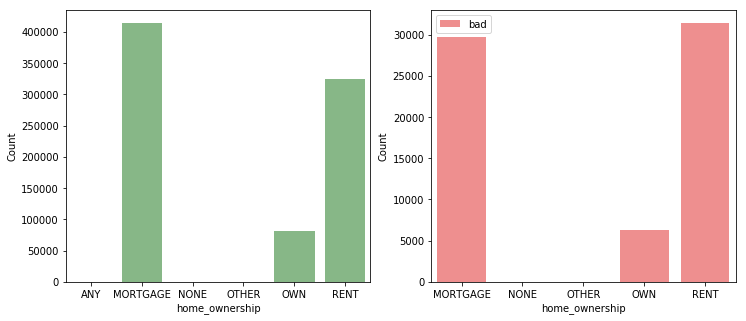

In [229]:
fig, (ax, ax2) = plt.subplots(ncols=2,figsize=(12,5))

sns.barplot(test[test['loan_condition']=='Good Loan'].iloc[:,1],test[test['loan_condition']=='Good Loan'].iloc[:,2],alpha=0.5, color='g', label = 'good', ax=ax)
sns.barplot(test[test['loan_condition']=='Bad Loan'].iloc[:,1],test[test['loan_condition']=='Bad Loan'].iloc[:,2],alpha=0.5, color='r', label = 'bad', ax=ax2)


plt.legend(loc='best')
plt.show()

On the chart above, we see that there's imbalance categorical feature between two loan condition. the ANY category does not present on bad loan. This category should be deleted, since it make high colinearity to the label.

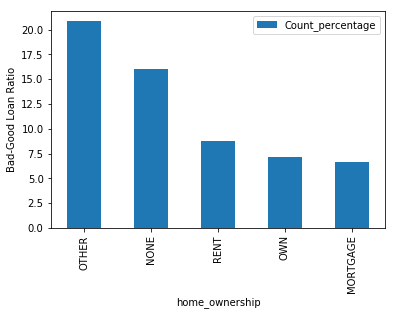

In [211]:
test['Count_percentage'] = test.iloc[:,1:].groupby(['home_ownership']).apply(lambda x:100 * x / float(x.sum()))
test
test[test['loan_condition']=='Bad Loan'].sort_values('Count_percentage',ascending=False)[['home_ownership','Count_percentage']].plot.bar(x='home_ownership')
plt.ylabel('Bad-Good Loan Ratio')
plt.show()

Using similar approach as previous feature, I use this following formula to create the chart above (bad loan and good loan ratio on each home ownership category).

$$\left(\frac{\sum_{j=0}^{n}bad_{j}}{\sum_{j=0}^{n}bad_{j}+\sum_{i=0}^{n}good_{i}}\right) _{home\_ownership}$$

From the chart above, The MORTGAGE and OWN home ownership take the lowest portion of bad and good ratio. while the OTHER ownership take the lead. It makes sense to me. Someone who cannot determine the ownership of where he life, will tend to default.

### Application Type

Show the application type respect to the loan condition

In [205]:
#application type vs loan condition
test = dataset.groupby(["loan_condition", "application_type"]).size().reset_index(name='Count')
test

,loan_condition,application_type,Count
0,Bad Loan,INDIVIDUAL,67424
1,Bad Loan,JOINT,5
2,Good Loan,INDIVIDUAL,819444
3,Good Loan,JOINT,506


calculate and visualize the ratio between bad and good loan on each of both application type

$$\left(\frac{\sum_{j=0}^{n}bad_{j}}{\sum_{j=0}^{n}bad_{j}+\sum_{i=0}^{n}good_{i}}\right) _{application\_type}$$

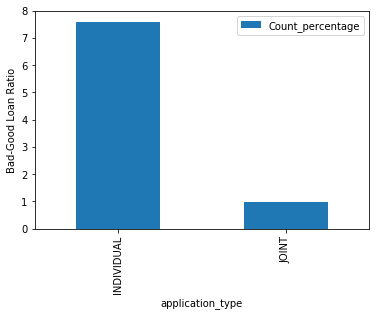

In [206]:
test['Count_percentage'] = test.iloc[:,1:].groupby(['application_type']).apply(lambda x:100 * x / float(x.sum()))
test
test[test['loan_condition']=='Bad Loan'][['application_type','Count_percentage']].plot.bar(x='application_type')
plt.ylabel('Bad-Good Loan Ratio')
plt.show()

The borrower who requested the loan in JOINT scheme has overall ratio bad ratio. In the real world case, the joint scheme minimize the probability of default, since the borrower will help each other to pay up the loan. The individual has a higher chance of default, because they have no way to pay up the loan if they bankrupt (another way, the individual could take debt consolidation).

### Purpose

Does The loan purpose have an effect to loan condition?

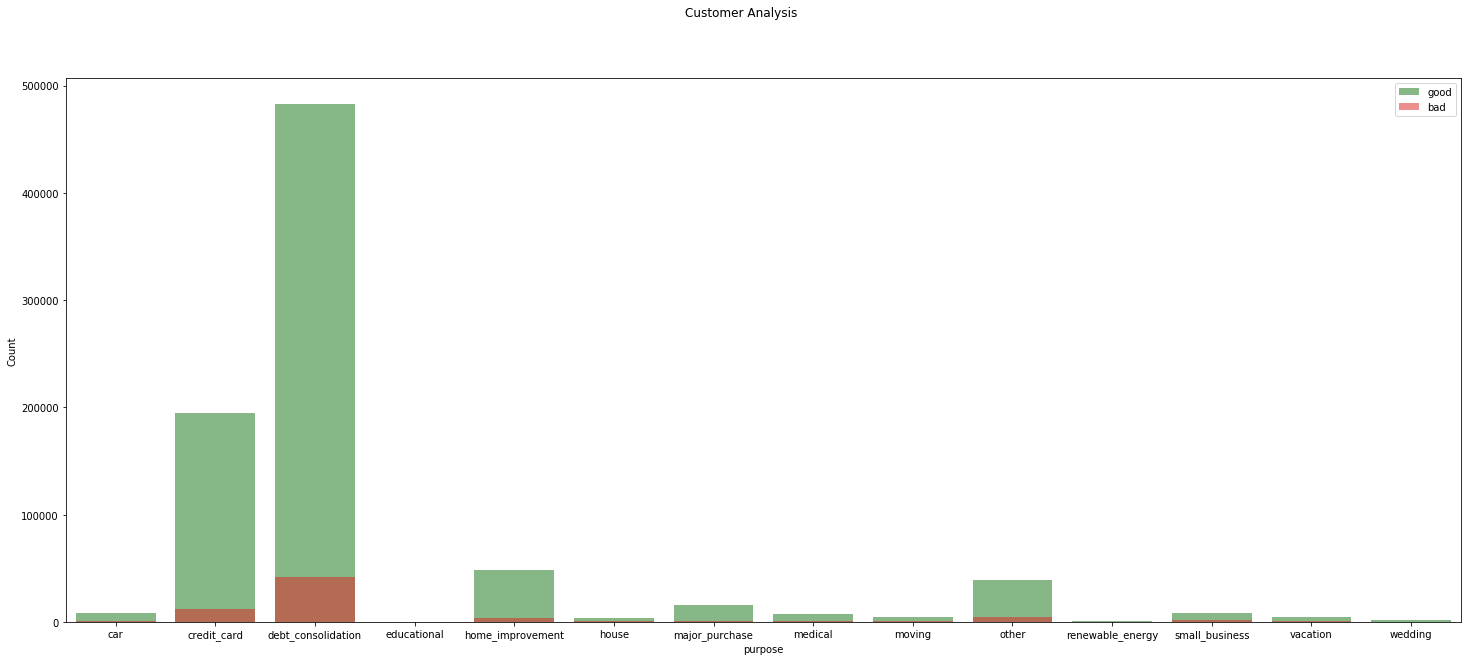

In [212]:
#purpose vs loan condition

test = dataset.groupby(["loan_condition", "purpose"]).size().reset_index(name='Count')

fig = plt.figure(figsize = (25, 10))
sns.barplot(test[test['loan_condition']=='Good Loan'].iloc[:,1],test[test['loan_condition']=='Good Loan'].iloc[:,2],alpha=0.5, color='g', label = 'good')
sns.barplot(test[test['loan_condition']=='Bad Loan'].iloc[:,1],test[test['loan_condition']=='Bad Loan'].iloc[:,2],alpha=0.5, color='r', label = 'bad')
plt.legend(loc='best')
fig.suptitle('Customer Analysis')
plt.show()

I am tired to say this, but it will be the same for this feature as well.

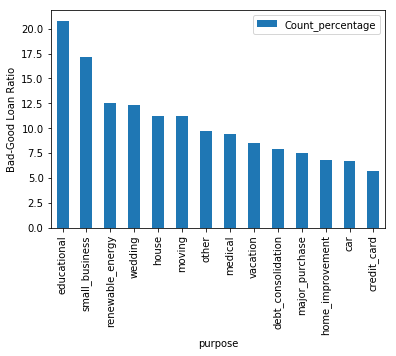

In [213]:
test['Count_percentage'] = test.iloc[:,1:].groupby(['purpose']).apply(lambda x:100 * x / float(x.sum()))
test
test[test['loan_condition']=='Bad Loan'].sort_values('Count_percentage',ascending=False)[['purpose','Count_percentage']].plot.bar(x='purpose')
plt.ylabel('Bad-Good Loan Ratio')
plt.show()

The education reason has the higher ratio of bad loan, while the credit card has the lower ratio. My assumption, the borrower fail to pay the loan, because they fail to got a proper job on time or they got a job with low wage.

### Interest Rate

I split the interest rate into 50 uniform bin. For every bin, I calculate the ratio between bad and good loan condition.

C:\Users\ilham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


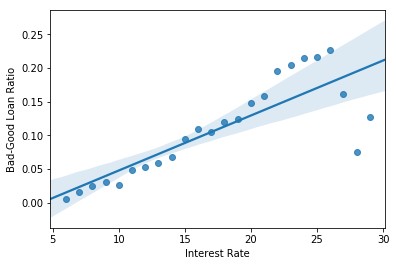

In [214]:
#interest rate vs loan condition

good = dataset[dataset['loan_condition']=='Good Loan']['interest_rate']
bad = dataset[dataset['loan_condition']=='Bad Loan']['interest_rate']

good_y, x = np.histogram(good, bins=range(4,40,1))
bad_y, x = np.histogram(bad, bins=x)
x=x[1:]

# Turn into pandas DataFrame
good_bar = pd.DataFrame({'loan_condition' :np.array(['Good Loan']*len(x)).astype('object'),
                         'bin': x,
                         'Count': good_y,})
bad_bar = pd.DataFrame({'loan_condition' :np.array(['Bad Loan']*len(x)).astype('object'),
                        'bin': x,
                        'Count': bad_y,})
merge_bar = pd.concat([good_bar,bad_bar]).reset_index(drop=True)

merge_bar['Count_percentage'] = merge_bar.groupby('bin')['Count'].apply(lambda x: x.astype(float)/x.sum())

#merge_bar[merge_bar['loan_condition']=='Bad Loan'][['bin','Count_percentage']].set_index('bin').plot.line(color='r')
sns.regplot(merge_bar[merge_bar['loan_condition']=='Bad Loan']['bin'],merge_bar[merge_bar['loan_condition']=='Bad Loan']['Count_percentage'])
plt.ylabel('Bad-Good Loan Ratio')
plt.xlabel('Interest Rate')
plt.show()

I drew the trenline as well to help you see the pattern. We see from the trenline that the higher interest rate will has higher ratio of bad. It does make sense, How they operate the business if the majority of its profit used to pay the installment?

### Grade

I assumed that grade features are provided by FICO or other credit scoring company. So it is valid to be predictor.

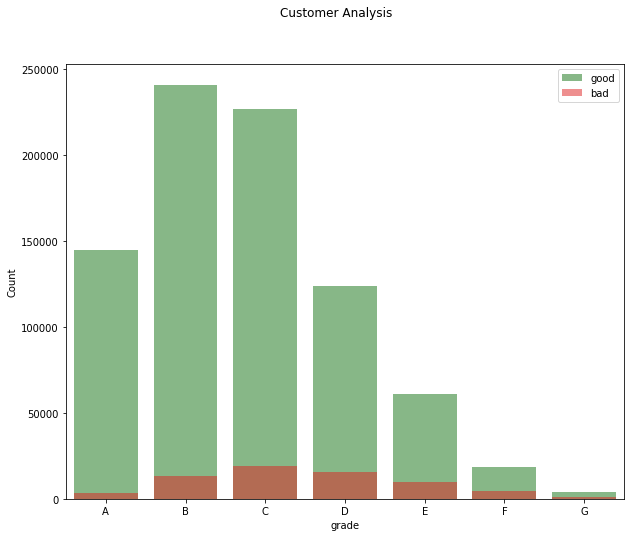

In [216]:
#purpose vs loan condition

test = dataset.groupby(["loan_condition", "grade"]).size().reset_index(name='Count')

fig = plt.figure(figsize = (10, 8))
sns.barplot(test[test['loan_condition']=='Good Loan'].iloc[:,1],test[test['loan_condition']=='Good Loan'].iloc[:,2],alpha=0.5, color='g', label = 'good')
sns.barplot(test[test['loan_condition']=='Bad Loan'].iloc[:,1],test[test['loan_condition']=='Bad Loan'].iloc[:,2],alpha=0.5, color='r', label = 'bad')
plt.legend(loc='best')
fig.suptitle('Customer Analysis')
plt.show()

Another bad vs good loan ratio for each category

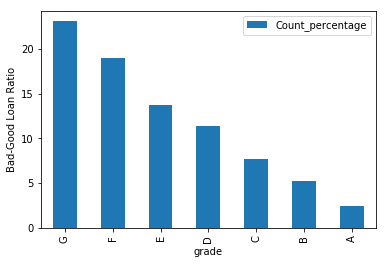

In [217]:
test['Count_percentage'] = test.iloc[:,1:].groupby(['grade']).apply(lambda x:100 * x / float(x.sum()))
test
test[test['loan_condition']=='Bad Loan'].sort_values('Count_percentage',ascending=False)[['grade','Count_percentage']].plot.bar(x='grade')
plt.ylabel('Bad-Good Loan Ratio')
plt.show()

The higher grade (A) the lower bad loan ratio. On the other hand, the lower the grade the higher bad loan ratio.

### Grade vs Annual Income

Text(0.5, 1.0, 'Loan Amount Distribution by Grade')

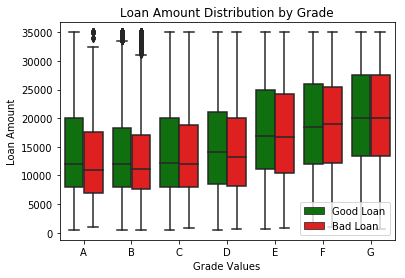

In [226]:
sns.boxplot(x='grade', y="loan_amount",data=dataset, 
               hue="loan_condition", palette = ['g','r'],  
               order=["A",'B','C','D','E','F', 'G'])
plt.legend(loc='lower right')
plt.xlabel("Grade Values")
plt.ylabel("Loan Amount")
plt.title("Loan Amount Distribution by Grade")

### Grade vs Interest Rate

Text(0.5, 1.0, 'Interest Rate Distribution by Grade')

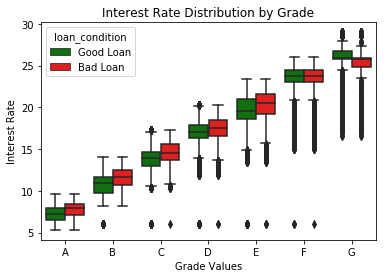

In [22]:
sns.boxplot(x='grade', y="interest_rate",data=dataset, 
               hue="loan_condition", palette = ['g','r'],  
               order=["A",'B','C','D','E','F', 'G'])
plt.xlabel("Grade Values")
plt.ylabel("Interest Rate")
plt.title("Interest Rate Distribution by Grade")

The lower the grade the higher the interest rate.

### Debt to Income Ratio

I split the Debt to Income ratio into 35 uniform bin. For every bin, I calculate the ratio between bad and good loan condition.

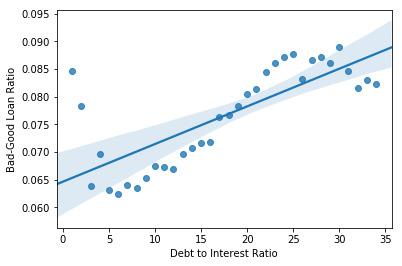

In [219]:
#dti vs loan condition

good = dataset[dataset['loan_condition']=='Good Loan']['dti']
bad = dataset[dataset['loan_condition']=='Bad Loan']['dti']

good_y, x = np.histogram(good, bins=range(0,35,1))
bad_y, x = np.histogram(bad, bins=x)
x=x[1:]

# Turn into pandas DataFrame
good_bar = pd.DataFrame({'loan_condition' :np.array(['Good Loan']*len(x)).astype('object'),
                         'bin': x,
                         'Count': good_y,})
bad_bar = pd.DataFrame({'loan_condition' :np.array(['Bad Loan']*len(x)).astype('object'),
                        'bin': x,
                        'Count': bad_y,})
merge_bar = pd.concat([good_bar,bad_bar]).reset_index(drop=True)

merge_bar['Count_percentage'] = merge_bar.groupby('bin')['Count'].apply(lambda x: x.astype(float)/x.sum())

#merge_bar[merge_bar['loan_condition']=='Bad Loan'][['bin','Count_percentage']].set_index('bin').plot.line(color='r')
sns.regplot(merge_bar[merge_bar['loan_condition']=='Bad Loan']['bin'],merge_bar[merge_bar['loan_condition']=='Bad Loan']['Count_percentage'])
plt.xlabel("Debt to Interest Ratio")
plt.ylabel("Bad-Good Loan Ratio")
plt.show()

From the trendline, the higher DTI will tend to default. But, it doesn't always like that. from the scatter plot, the 0 DTI also has pretty high chance to be defaulted. The first time borrower? so they doesn't know how to manage their finance?

### Region

In my Opinion, every region have different problem. Same number of loan requested might have different intrinsic value in different region. It also applies to annual income. So this region stuff should be analyzed further.

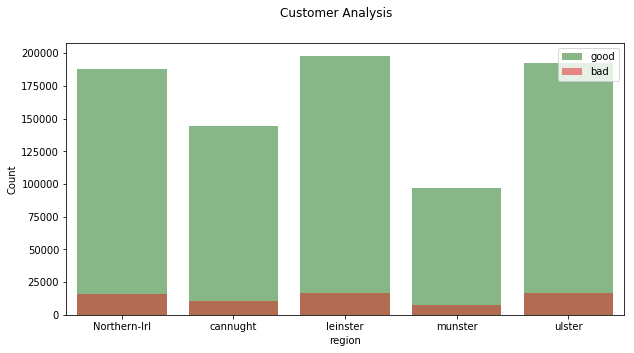

In [24]:
#region vs income

test = dataset.groupby(["loan_condition", "region"]).size().reset_index(name='Count')

fig = plt.figure(figsize = (10, 5))
sns.barplot(test[test['loan_condition']=='Good Loan'].iloc[:,1],test[test['loan_condition']=='Good Loan'].iloc[:,2],alpha=0.5, color='g', label = 'good')
sns.barplot(test[test['loan_condition']=='Bad Loan'].iloc[:,1],test[test['loan_condition']=='Bad Loan'].iloc[:,2],alpha=0.5, color='r', label = 'bad')
plt.legend(loc='best')
fig.suptitle('Customer Analysis')
plt.show()

Using similar approach, ratio bad-good loan for every region

C:\Users\ilham\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


(6.5, 8.287540545697386)

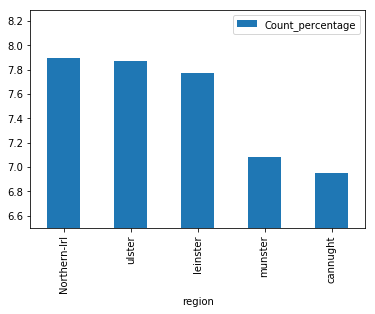

In [25]:
test['Count_percentage'] = test.iloc[:,1:].groupby(['region']).apply(lambda x:100 * x / float(x.sum()))
test
test[test['loan_condition']=='Bad Loan'].sort_values('Count_percentage',ascending=False)[['region','Count_percentage']].plot.bar(x='region')
plt.ylim(ymin=6.5)

It seems like the ration between 5 region is slightly different. I cannot belive it yet, but I will check it again with feature importance, whether or not to remove it in the training process

## Feature Drop
There are feature that I left behind. The reason was we don't have these feature value when we will predict loan condition. If the borrower req
- total payment : how come you get this data when user requested for loan? from the future?
- total received principle : how come you get this data if our lender will fund this loan? from future?
- recoveries : how come you get this data if our borrower will default or not? do they have asset to pay up the loan if determined as default?
- installment : oh boy... it has collinearity of interest rate.
<br><br>
NOTE:<br>
If we assumed these data as a historical data, well... it still doesn't make sense. There is no unique user identifier which every loan request belong to which company. So I cannot move with this scenario. <br>
<br>
So, I assumed that this data is used by creator to determine the loan condition MANUALLY, after they got the data.

## Feature Engineering

### Select the feature

I slice the dataset on specific features bassed on previous analysis

In [26]:
#Slice the dataset
dataset_dummy = dataset[['issue_d','loan_condition_cat','emp_length_int','grade','home_ownership','annual_inc','loan_amount','term','application_type','purpose','interest_rate','dti','region']]
#Change the issue_d dtype into proper datetime format
dataset_dummy['issue_d'] = pd.to_datetime(dataset_dummy['issue_d'],format='%d/%m/%Y')
#Sort dataset by issue_d
dataset_dummy = dataset_dummy.sort_values(by='issue_d').reset_index(drop=True)
dataset_dummy.head(5)

C:\Users\ilham\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,issue_d,loan_condition_cat,emp_length_int,grade,home_ownership,annual_inc,loan_amount,term,application_type,purpose,interest_rate,dti,region
0,2007-06-01,0,0,E,OWN,22000,7500,36 months,INDIVIDUAL,debt_consolidation,13.75,14.29,Northern-Irl
1,2007-06-01,0,0,C,RENT,20000,6000,36 months,INDIVIDUAL,debt_consolidation,10.59,12.90,Northern-Irl
2,2007-06-01,0,2,B,MORTGAGE,30000,4400,36 months,INDIVIDUAL,debt_consolidation,9.64,3.72,Northern-Irl
3,2007-06-01,0,0,B,RENT,36000,1200,36 months,INDIVIDUAL,other,9.01,3.27,munster
4,2007-06-01,0,0,C,RENT,28000,5000,36 months,INDIVIDUAL,other,11.22,3.51,Northern-Irl


### Delete Some Weird Stuff

#### Income

delete the data that has weird amount. e.g. 0 dollar. How come you take a loan, when you don't have an income?

In [27]:
dataset_dummy = dataset_dummy.drop(dataset_dummy[dataset_dummy.loan_amount < 50].index)

#### DTI

Delete DTI that has a tremendous amount. You have pretty huge debt, but you still brave enough to take the loan. Wow!

In [28]:
dataset_dummy = dataset_dummy.drop(dataset_dummy[dataset_dummy.dti > 1000].index)

### Corelation between Variable

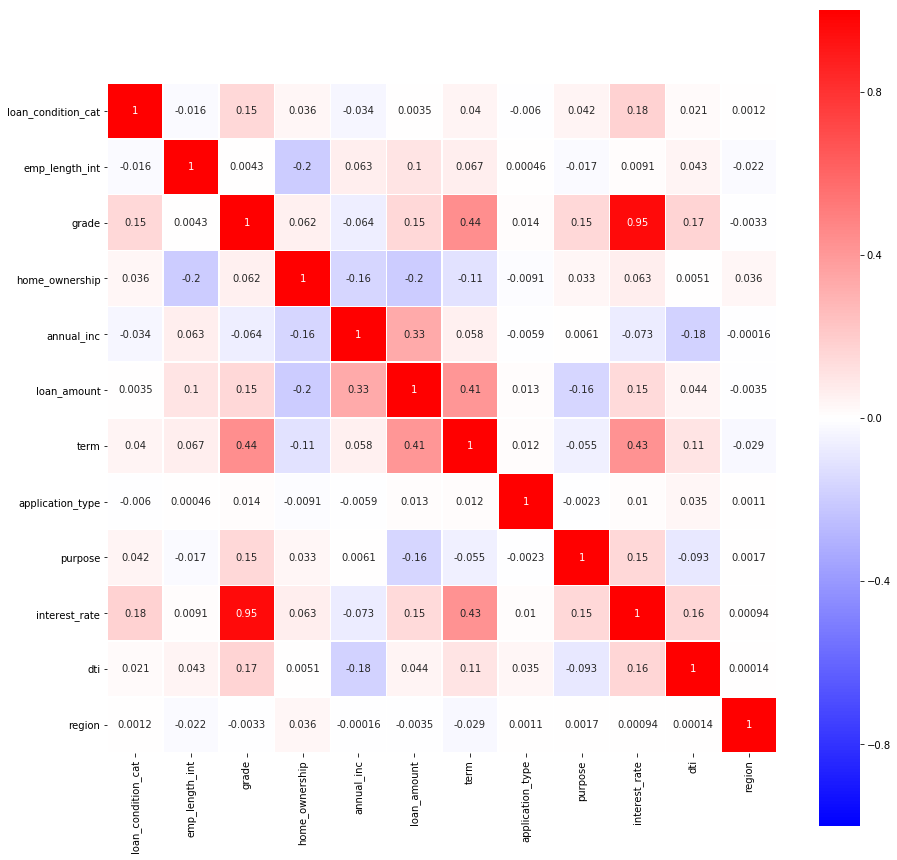

In [29]:
plt.figure(figsize=(15,15))
dataset_dummy_numerical = dataset_dummy.assign(emp_length_int=dataset_dummy.emp_length_int.astype('category').cat.codes,
                           term=dataset_dummy.term.astype('category').cat.codes,
                           home_ownership=dataset_dummy.home_ownership.astype('category').cat.codes,
                           application_type=dataset_dummy.application_type.astype('category').cat.codes,
                           purpose=dataset_dummy.purpose.astype('category').cat.codes,
                           region=dataset_dummy.region.astype('category').cat.codes,
                           grade=dataset_dummy.grade.astype('category').cat.codes
                        )
sns.heatmap(dataset_dummy_numerical.corr(), annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(dataset_dummy_numerical.iloc[:,1:].values, i) for i in range(dataset_dummy_numerical.iloc[:,1:].shape[1])]
vif["features"] = dataset_dummy_numerical.iloc[:,1:].columns
vif.round(1).sort_values(by=['VIF Factor']).reset_index(drop=True)

,VIF Factor,features
0,1.0,application_type
1,1.1,loan_condition_cat
2,2.1,term
3,2.4,purpose
4,2.7,annual_inc
5,2.7,region
6,3.3,home_ownership
7,3.8,emp_length_int
8,5.6,loan_amount
9,5.6,dti


Because the interest rate and the grade pretty high correlation, we will keep only one between them and delete the other one. In this case, I will delete the grade, because the interest rate is continues variable.
<br><br>
I think I change my mind. I won't delete one of the feature, instead I will use multicollinearity-immune-model like tree-based. Since the are lot of outlier in the dataset, tree-based model is better than value-sensitive model like Neural Network and Logistic Regression (easy to BOOM BANG DASH when there is a feature with larger value than the usual value). <br> <br>

NOTE: <br>
this decision is only applied when the collinearity is happened between the feature and not between feature-label. When the feature has hight correlation with label, why should we use prediction model? just use that single feature to shoot the label. HAHA... just kidding. in fact, we should delete this high correlated feature.

### One Hot Encoding

#### Employement Length

Since the employement length is on categorical form, so i will convert it to one-hot encoding.

In [31]:
#One-hot encoding
y = pd.get_dummies(dataset_dummy.emp_length_int, prefix='emp_length_int')
y = y.iloc[:, :-1]
dataset_dummy = pd.concat([dataset_dummy, y],axis=1).drop(['emp_length_int'],axis=1)

#### Term

Convert the term in to one-hot encoding. 0 for 36 months and 1 for 60 months. I make my own categorical form, I just want to make every categorical feature to be more uniform (in this case 1 and 0).

In [32]:
#One-hot encoding
y = pd.get_dummies(dataset_dummy.term, prefix='term')
y = y.iloc[:, :-1]
dataset_dummy = pd.concat([dataset_dummy, y],axis=1).drop(['term'],axis=1)

#### Home ownership

Make the home_ownership feature into one-hot encoding format. I delete ANY category, since it's one sided value. I also delete the NONE cateogry and I will represent it with zero for the rest of home_ownership category. e.g. 0 for MORTGAGE, OTHER, OWN, and RENT will represent 1 NONE. This is my way to minimize colinearity.

In [33]:
#one-hot encoding
y = pd.get_dummies(dataset_dummy.home_ownership, prefix='home_ownership')
#Select sp
y = y[['home_ownership_MORTGAGE','home_ownership_OTHER','home_ownership_OWN','home_ownership_RENT']]
#merge with the main dataset
dataset_dummy = pd.concat([dataset_dummy, y],axis=1).drop(['home_ownership'],axis=1)


#### Application Type

one-hot encoding system. I prefer to make everything more uniform for categorical system.

In [34]:
y = pd.get_dummies(dataset_dummy.application_type, prefix='application_type')
y = y.iloc[:, :-1]
dataset_dummy = pd.concat([dataset_dummy, y],axis=1).drop(['application_type'],axis=1)

#### Purpose

one-host encoding system. I delete the OTHER category and represent it with 0 for the rest of category in purpose feature.

In [35]:
#one-hot encoding
y = pd.get_dummies(dataset_dummy.purpose, prefix='purpose')
#take only specific column
y = y[['purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding']]
#merge with main dataset
dataset_dummy = pd.concat([dataset_dummy, y],axis=1).drop(['purpose'],axis=1)

#### Region

Another one-hot encoding.

In [36]:
y = pd.get_dummies(dataset_dummy.region, prefix='region')
y = y.iloc[:, :-1]
dataset_dummy = pd.concat([dataset_dummy, y],axis=1).drop(['region'],axis=1)

#### Grade

Another one-hot encoding.

In [37]:
y = pd.get_dummies(dataset_dummy.grade, prefix='grade')
y = y.iloc[:, :-1]
dataset_dummy = pd.concat([dataset_dummy, y],axis=1).drop(['grade'],axis=1)

## Making Dataset

### Split Dataset

In this session, I planned to split the dataset into 3 big chunks. Those are, 
- Out of Time Before : Data proccured before the main dataset. 
- MainData : Data used for main analysis
- Out of Time After : Data proccured after the main dataset. <br>
<br>


why should I split the dataset into 3 chunks?<br>
well... it is useful to see the model stability at the really-unseen data.<br>
<br>
NOTE:<br>
when you take the training data on the data ranged from February 2020 to November 2020, then January 2020 will be the Out of Time Before Data and December 2020 will be the Out of Time After Data.

specify the date range for Main Dataset

In [38]:
start_date = '2012-12-01'
end_date = '2015-10-01'

Split the dataset based on defined date

In [39]:
#Split Dataset Phase 1
#MainDataset
mainData = dataset_dummy[(dataset_dummy['issue_d'] >= start_date) & (dataset_dummy['issue_d'] <= end_date)].drop(columns=['issue_d'])

#Outoftime
#Before
OOTB = dataset_dummy[(dataset_dummy['issue_d'] < start_date)].drop(columns=['issue_d'])

#After
OOTA = dataset_dummy[(dataset_dummy['issue_d'] > end_date)].drop(columns=['issue_d'])

### Save file

In [41]:
#Save file
#MainDataset
mainData.to_csv('./dataset/mainData.csv',index=False)

#Outoftime
#Before
OOTB.to_csv('./dataset/OOTB.csv',index=False)

#After
OOTA.to_csv('./dataset/OOTA.csv',index=False)

# Data Preprocessing

## Load Data

load data from existing file

In [8]:
import numpy as np
import pandas as pd
mainData = pd.read_csv('./dataset/mainData.csv').iloc[:,:25]
OOTB = pd.read_csv('./dataset/OOTB.csv').iloc[:,:25]
OOTA = pd.read_csv('./dataset/OOTA.csv').iloc[:,:25]

## Train-Val-Test Split

split main dataset into 3 sub-dataset (train, val, and test). After that, assign the feature and label on every dataset into new variable. e.g. feature for OOTB will be saved in X_OOTB and the label for OOTB will be saved in y_OOTB.

In [9]:
from sklearn.model_selection import train_test_split

#MainDataset
X_train, X_rest, y_train, y_rest = train_test_split(mainData.iloc[:,1:], mainData.iloc[:,0], test_size=0.30, random_state=12345)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=67890)

#OutOfTime
X_OOTB,y_OOTB = OOTB.iloc[:,1:],OOTB.iloc[:,0]
X_OOTA,y_OOTA = OOTA.iloc[:,1:],OOTA.iloc[:,0]

## Processing Training Data

packing the training into one set variable

In [10]:
training_set = pd.concat([y_train.reindex(X_train.index),X_train], axis=1)

### Outlier removal

#### The theory

<img src='./images/standard-deviation-far-from-mean.png' width='300' align="center">

$$\mu \pm \alpha \sigma$$

In a Normal distribution model:
- about 68% of the values fall within 1 standard deviation of the mean
- about 95% of the values fall within 2 standard deviations of the mean
- about 99.7% of the values fall within 3 standard deviation of the mean

#### DTI

Take only 95% data close to mean.

In [11]:
feature_name = 'dti'
alpha = 2
training_set = training_set[training_set[feature_name] < training_set[feature_name].mean()+alpha*training_set[feature_name].std()]

#### Annual Income

Take only 95% data close to mean.

In [12]:
feature_name = 'annual_inc'
alpha = 2
training_set = training_set[training_set[feature_name] < training_set[feature_name].mean()+alpha*training_set[feature_name].std()]

### Oversampling

Visualize the number of bad and good loan on single chart.

In [13]:
pd.Series(training_set.iloc[:,0]).value_counts().plot(kind='bar')

Oversamplinng with SMOTE technique.

In [14]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
(X_smote, y_smote) = smote.fit_sample(training_set.iloc[:,1:], training_set.iloc[:,0])

Visualize the result of oversampling. You will see that the number of bad loan will be same as good loan.

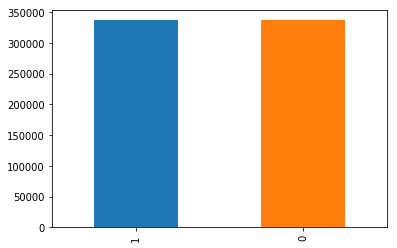

In [15]:
pd.Series(y_smote).value_counts().plot(kind='bar')

# Making Model

## The Plan

<img src='./images/model_plan.jpg' width='600' align="center">

I planned to use Stacking Ensemble model. I will combine numbers of different models to tackle some disadvantage between the model. I will train individually independent model. the new dataset is created by predicting the dataset with trained model. these trained model will be predicting whole 3 different datasets (mainData, OOTB, and OOTA). The meta model will be trained over this new dataset. The final prediction is decided by meta model through new dataset. Seems complicated, but we will see it in practice.

## Level-0 LightGBM

In [50]:
#Model
#LightGBM
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_smote, y_smote)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'application':'binary',
    'metric': {'accuracy', 'auc'},
    'num_leaves': 70,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.6,
    'bagging_freq':70,
    'verbose': 0,
    'device_type': 'cpu',
    'num_threads': 4,
    'lambda_l1':0.01,
    'lambda_l2':0.1,
    'extra_trees':80,
    'min_data_in_leaf':100,
    'max_bin':100,
    'max_depth':4,
    'scale_pos_weight ':1
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5000,
                valid_sets=lgb_eval,
                early_stopping_rounds=100)

print('Saving model...')
# save model to file
gbm.save_model('./model/lgbm.txt')

Starting training...
[1]	valid_0's auc: 0.65072
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.676777
[3]	valid_0's auc: 0.679095
[4]	valid_0's auc: 0.681472
[5]	valid_0's auc: 0.682624
[6]	valid_0's auc: 0.682998
[7]	valid_0's auc: 0.684022
[8]	valid_0's auc: 0.684165
[9]	valid_0's auc: 0.684686
[10]	valid_0's auc: 0.684956
[11]	valid_0's auc: 0.684433
[12]	valid_0's auc: 0.684021
[13]	valid_0's auc: 0.684009
[14]	valid_0's auc: 0.684684
[15]	valid_0's auc: 0.685012
[16]	valid_0's auc: 0.685364
[17]	valid_0's auc: 0.686182
[18]	valid_0's auc: 0.687242
[19]	valid_0's auc: 0.687077
[20]	valid_0's auc: 0.687717
[21]	valid_0's auc: 0.687923
[22]	valid_0's auc: 0.688954
[23]	valid_0's auc: 0.688851
[24]	valid_0's auc: 0.689046
[25]	valid_0's auc: 0.68925
[26]	valid_0's auc: 0.689213
[27]	valid_0's auc: 0.689386
[28]	valid_0's auc: 0.689111
[29]	valid_0's auc: 0.689541
[30]	valid_0's auc: 0.689311
[31]	valid_0's auc: 0.689521
[32]	valid_0's auc: 0.689242


## Level-0 XGBoost

In [ ]:
from xgboost import XGBClassifier

XGB = XGBClassifier(silent=False,
                    scale_pos_weight=1,
                    learning_rate=0.01,
                    colsample_bytree = 0.4,
                    subsample = 0.8,
                    objective='binary:logistic',
                    n_estimators=1000,
                    reg_alpha = 0.3,
                    max_depth=3,
                    min_child_weight = 5,
                    gamma=10)
%time XGB.fit(X_smote, y_smote,eval_metric=['auc'], eval_set=[(X_smote, y_smote),(X_val.values, y_val.values)], early_stopping_rounds=20)
XGB.save_model('./model/XGB.txt')

## Level-0 CatBoost

In [136]:
#CatBoost
from catboost import CatBoostClassifier
cgbm = CatBoostClassifier(eval_metric='AUC',
                          use_best_model=True,
                          random_seed=42,
                          learning_rate=0.01,
                          iterations = 1000,
                          l2_leaf_reg=0.1,
                          depth=4,          
                          od_type = "Iter",
                          od_wait = 100
                         )
%time cgbm.fit(X_smote,y_smote,eval_set=(X_val,y_val),)
cgbm.save_model('./model/cgbm.txt')

0:	test: 0.6472011	best: 0.6472011 (0)	total: 331ms	remaining: 5m 30s
1:	test: 0.6496750	best: 0.6496750 (1)	total: 671ms	remaining: 5m 34s
2:	test: 0.6505170	best: 0.6505170 (2)	total: 977ms	remaining: 5m 24s
3:	test: 0.6576573	best: 0.6576573 (3)	total: 1.37s	remaining: 5m 41s
4:	test: 0.6574536	best: 0.6576573 (3)	total: 1.72s	remaining: 5m 42s
5:	test: 0.6505170	best: 0.6576573 (3)	total: 2.02s	remaining: 5m 33s
6:	test: 0.6574757	best: 0.6576573 (3)	total: 2.35s	remaining: 5m 34s
7:	test: 0.6579522	best: 0.6579522 (7)	total: 2.69s	remaining: 5m 33s
8:	test: 0.6579522	best: 0.6579522 (7)	total: 2.97s	remaining: 5m 27s
9:	test: 0.6596459	best: 0.6596459 (9)	total: 3.32s	remaining: 5m 29s
10:	test: 0.6595611	best: 0.6596459 (9)	total: 3.63s	remaining: 5m 26s
11:	test: 0.6595325	best: 0.6596459 (9)	total: 3.96s	remaining: 5m 26s
12:	test: 0.6593377	best: 0.6596459 (9)	total: 4.3s	remaining: 5m 26s
13:	test: 0.6592080	best: 0.6596459 (9)	total: 4.62s	remaining: 5m 25s
14:	test: 0.65947

## Level-0 Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier
from joblib import dump
RF = RandomForestClassifier(n_estimators=500,
                            max_depth=3,
                            random_state=467,
                            min_samples_leaf=1,
                            verbose=0)
%time RF.fit(X_smote,y_smote)

probs = RF.predict_proba(X_val)[:, 1]
fpr, tpr, threshold = roc_curve(y_val, probs)
roc_auc = auc(fpr, tpr)
GINI = 2*roc_auc-1
print('auc :',roc_auc)
dump(RF, './model/RF.joblib') 

Wall time: 3min 33s
auc : 0.6387317599914233


## Level-0 Decision Tree

In [148]:
from sklearn.tree import DecisionTreeClassifier
from joblib import dump
DT = DecisionTreeClassifier(max_depth=2,
                            random_state=467,
                            min_samples_leaf=1)
%time DT.fit(X_smote,y_smote)

probs = DT.predict_proba(X_val)[:, 1]
fpr, tpr, threshold = roc_curve(y_val, probs)
roc_auc = auc(fpr, tpr)
GINI = 2*roc_auc-1
print('auc :',roc_auc)
dump(DT, './model/DT.joblib') 

Wall time: 2.14 s
auc : 0.6615849214077821


['./model/DT.joblib']

## Level-0 Load Model

### LGB

In [5]:
import lightgbm as lgb
gbm = lgb.Booster(model_file='./model/lgbm.txt')

### XGB

In [67]:
import xgboost as xgb
XGB = xgb.Booster(model_file='./model/XGB.txt')
print(XGB)
probs = XGB.predict(xgb.DMatrix(X_smote))
fpr, tpr, threshold = roc_curve(y_OOTA, probs)
roc_auc = auc(fpr, tpr)
print('OOTA auc :',roc_auc)

OOTA auc : 0.9396156728989769


### CBG

In [59]:
from catboost import CatBoostClassifier
cgbm = CatBoostClassifier().load_model('./model/cgbm.txt')

### RF and Dat

In [62]:
from joblib import load
RF = load('./model/RF.joblib')
DT = load('./model/DT.joblib')

## Level-0 Evaluation

In [63]:
#Evaluation
#AUC & GINI score
#MainDataset-Test & OOTB & OOTA
from sklearn.metrics import roc_curve, roc_auc_score, auc
print('=====LightBGM=====')
probs = gbm.predict(X_OOTB)
fpr, tpr, threshold = roc_curve(y_OOTB, probs)
roc_auc = auc(fpr, tpr)
print('OOTB auc :',roc_auc)

probs = gbm.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
print('TEST auc :',roc_auc)

probs = gbm.predict(X_OOTA)
fpr, tpr, threshold = roc_curve(y_OOTA, probs)
roc_auc = auc(fpr, tpr)
print('OOTA auc :',roc_auc)

print('=====XGBoost=====')
probs = XGB.predict(xgb.DMatrix(X_OOTB))
fpr, tpr, threshold = roc_curve(y_OOTB, probs)
roc_auc = auc(fpr, tpr)
print('OOTB auc :',roc_auc)

probs = XGB.predict(xgb.DMatrix(X_test))
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
print('TEST auc :',roc_auc)

probs = XGB.predict(xgb.DMatrix(X_OOTA))
fpr, tpr, threshold = roc_curve(y_OOTA, probs)
roc_auc = auc(fpr, tpr)
print('OOTA auc :',roc_auc)

print('=====CatBoost=====')
probs = cgbm.predict_proba(X_OOTB)[:, 1]
fpr, tpr, threshold = roc_curve(y_OOTB, probs)
roc_auc = auc(fpr, tpr)
print('OOTB auc :',roc_auc)

probs = cgbm.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
print('TEST auc :',roc_auc)

probs = cgbm.predict_proba(X_OOTA)[:, 1]
fpr, tpr, threshold = roc_curve(y_OOTA, probs)
roc_auc = auc(fpr, tpr)
print('OOTA auc :',roc_auc)

print('=====Random Forest=====')
probs = RF.predict(X_OOTB)
fpr, tpr, threshold = roc_curve(y_OOTB, probs)
roc_auc = auc(fpr, tpr)
print('OOTB auc :',roc_auc)

probs = RF.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
print('TEST auc :',roc_auc)

probs = RF.predict(X_OOTA)
fpr, tpr, threshold = roc_curve(y_OOTA, probs)
roc_auc = auc(fpr, tpr)
print('OOTA auc :',roc_auc)

print('=====Decision Tree=====')
probs = DT.predict(X_OOTB)
fpr, tpr, threshold = roc_curve(y_OOTB, probs)
roc_auc = auc(fpr, tpr)
print('OOTB auc :',roc_auc)

probs = DT.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
print('TEST auc :',roc_auc)

probs = DT.predict(X_OOTA)
fpr, tpr, threshold = roc_curve(y_OOTA, probs)
roc_auc = auc(fpr, tpr)
print('OOTA auc :',roc_auc)

=====LightBGM=====
OOTB auc : 0.5805474864265704
TEST auc : 0.711594188019496
OOTA auc : 0.589286215267605
=====XGBoost=====
OOTB auc : 0.6054254014480747
TEST auc : 0.6368262772614492
OOTA auc : 0.5892851970162956
=====CatBoost=====
OOTB auc : 0.6347446703550751
TEST auc : 0.7005404308194834
OOTA auc : 0.6162170084609999
=====Random Forest=====
OOTB auc : 0.5497078378058137
TEST auc : 0.5680759766699858
OOTA auc : 0.5344075609445033
=====Decision Tree=====
OOTB auc : 0.566154662354611
TEST auc : 0.5939019969916255
OOTA auc : 0.5584066985367532


## Level-0 Output Dataset

In [75]:
#Train
source_label = y_smote
source_feature = X_smote
base_train_output = pd.DataFrame({'LightGBM':gbm.predict(source_feature),
                                  'XGBoost':XGB.predict(xgb.DMatrix(source_feature)),
                                  'CatBoost' : cgbm.predict_proba(source_feature)[:, 1],
                                  'RandomForest': RF.predict_proba(source_feature)[:, 1],
                                  'DecisionTree': DT.predict_proba(source_feature)[:, 1]},columns=['LightGBM','XGBoost','CatBoost','RandomForest','DecisionTree'])
base_train_output = pd.concat([base_train_output, pd.DataFrame(source_label, columns=['y'])], axis=1)
                               
#Val
source_label = y_val
source_feature = X_val
base_val_output = pd.DataFrame({'LightGBM':gbm.predict(source_feature),
                                'XGBoost':XGB.predict(xgb.DMatrix(source_feature.values)),
                                'CatBoost' : cgbm.predict_proba(source_feature)[:, 1],
                                'RandomForest': RF.predict_proba(source_feature)[:, 1],
                                'DecisionTree': DT.predict_proba(source_feature)[:, 1]},columns=['LightGBM','XGBoost','CatBoost','RandomForest','DecisionTree'])
base_val_output = pd.concat([base_val_output, y_val.reset_index(drop=True)], axis=1)

#Test
source_label = y_test
source_feature = X_test
base_test_output = pd.DataFrame({'LightGBM':gbm.predict(source_feature),
                                 'XGBoost':XGB.predict(xgb.DMatrix(source_feature.values)),
                                 'CatBoost' : cgbm.predict_proba(source_feature)[:, 1],
                                 'RandomForest': RF.predict_proba(source_feature)[:, 1],
                                 'DecisionTree': DT.predict_proba(source_feature)[:, 1]},columns=['LightGBM','XGBoost','CatBoost','RandomForest','DecisionTree'])
base_test_output = pd.concat([base_test_output, y_test.reset_index(drop=True)], axis=1)


#OOTB
source_label = y_OOTB
source_feature = X_OOTB
base_OOTB_output = pd.DataFrame({'LightGBM':gbm.predict(source_feature),
                                 'XGBoost':XGB.predict(xgb.DMatrix(source_feature.values)),
                                 'CatBoost' : cgbm.predict_proba(source_feature)[:, 1],
                                 'RandomForest': RF.predict_proba(source_feature)[:, 1],
                                 'DecisionTree': DT.predict_proba(source_feature)[:, 1]},columns=['LightGBM','XGBoost','CatBoost','RandomForest','DecisionTree'])
base_OOTB_output = pd.concat([base_OOTB_output, y_OOTB], axis=1)


#OOTA
source_label = y_OOTA
source_feature = X_OOTA
base_OOTA_output = pd.DataFrame({'LightGBM':gbm.predict(source_feature),
                                 'XGBoost':XGB.predict(xgb.DMatrix(source_feature.values)),
                                 'CatBoost' : cgbm.predict_proba(source_feature)[:, 1],
                                 'RandomForest': RF.predict_proba(source_feature)[:, 1],
                                 'DecisionTree': DT.predict_proba(source_feature)[:, 1]},columns=['LightGBM','XGBoost','CatBoost','RandomForest','DecisionTree'])
base_OOTA_output = pd.concat([base_OOTA_output, y_OOTA], axis=1)

## Level-1 Plan

Before I move to the meta model, I will select proper base model. I only take the most stable AUC metric result. Between 5 base model, LightGBM has pretty wide AUC range, the lowest value is around 0.58 and the highest performance is 0.71. It is pretty wide difference (13% difference). On the other hand, we have pretty narrow range on XGBoost, CatBoost, RandomForest, and Decision Tree.

On the next Meta Model, I will use CatBoost. The reason is pretty simple,
- catboost has the highest performance among base model.
- fast compared to XGBoost
- immune to multicollinearity (since I won't check the multicollinearity on new feature created by base model, i will take the safe route by using tree-base model. even it has multicollinearity, it is all coincidence. How come it has high correlation, even though the features created by the independence model?)

## Level-1 CatBoost

In [102]:
meta_cgbm = CatBoostClassifier(eval_metric='AUC',
                               loss_function = "Logloss",
                               use_best_model=True,
                               random_seed=5435,
                               learning_rate=0.01,
                               iterations = 1000,
                               l2_leaf_reg=0.08,
                               depth=7,          
                               od_type = "Iter",
                               od_wait = 20
                         )
meta_cgbm.fit(base_train_output.iloc[:,1:5].values,base_train_output.iloc[:,5].values,eval_set=(base_val_output.iloc[:,1:5].values,base_val_output.iloc[:,5].values))
meta_cgbm.save_model('./model/final_cgbm.txt')

0:	test: 0.6700266	best: 0.6700266 (0)	total: 476ms	remaining: 7m 55s
1:	test: 0.6814039	best: 0.6814039 (1)	total: 930ms	remaining: 7m 43s
2:	test: 0.6835360	best: 0.6835360 (2)	total: 1.37s	remaining: 7m 36s
3:	test: 0.6885647	best: 0.6885647 (3)	total: 1.8s	remaining: 7m 29s
4:	test: 0.6901047	best: 0.6901047 (4)	total: 2.33s	remaining: 7m 44s
5:	test: 0.6907259	best: 0.6907259 (5)	total: 2.83s	remaining: 7m 48s
6:	test: 0.6940074	best: 0.6940074 (6)	total: 3.32s	remaining: 7m 51s
7:	test: 0.6943031	best: 0.6943031 (7)	total: 3.79s	remaining: 7m 49s
8:	test: 0.6945167	best: 0.6945167 (8)	total: 4.22s	remaining: 7m 44s
9:	test: 0.6950612	best: 0.6950612 (9)	total: 4.66s	remaining: 7m 41s
10:	test: 0.6957683	best: 0.6957683 (10)	total: 5.14s	remaining: 7m 42s
11:	test: 0.6955935	best: 0.6957683 (10)	total: 5.56s	remaining: 7m 37s
12:	test: 0.6955076	best: 0.6957683 (10)	total: 6s	remaining: 7m 35s
13:	test: 0.6954894	best: 0.6957683 (10)	total: 6.46s	remaining: 7m 34s
14:	test: 0.6954

## Load Level-1 Model

In [103]:
from catboost import CatBoostClassifier
meta_cgbm = CatBoostClassifier().load_model('./model/final_cgbm.txt')

## Level-1 Evaluation

In [105]:
print('=====Level-1 Meta CatBoost=====')
probs = meta_cgbm.predict_proba(base_OOTB_output.iloc[:,1:5])[:, 1]
fpr, tpr, threshold = roc_curve(base_OOTB_output.iloc[:,5], probs)
roc_auc = auc(fpr, tpr)
print('OOTB auc :',roc_auc)

probs = meta_cgbm.predict_proba(base_test_output.iloc[:,1:5])[:, 1]
fpr, tpr, threshold = roc_curve(base_test_output.iloc[:,5], probs)
roc_auc = auc(fpr, tpr)
print('TEST auc :',roc_auc)

probs = meta_cgbm.predict_proba(base_OOTA_output.iloc[:,1:5])[:, 1]
fpr, tpr, threshold = roc_curve(base_OOTA_output.iloc[:,5], probs)
roc_auc = auc(fpr, tpr)
print('OOTA auc :',roc_auc)

=====Level-1 Meta CatBoost=====
OOTB auc : 0.6362941435172493
TEST auc : 0.6998182444534787
OOTA auc : 0.6193472348619055


in this level 1 model, we see that the AUC for both dataset really close to each other. In my opinion, this number still represent instability. Look, the largest difference between those AUC's is up to 8%. well... it means you need to tune the model hyperparameter and/or rearrange the stacking composition (add another model, or remove the existing model)

## Why AUC?

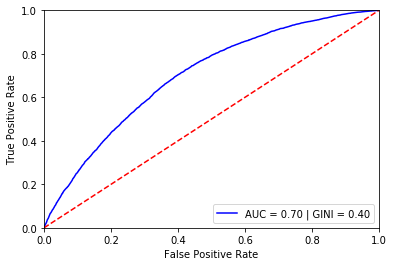

In [168]:
probs = meta_cgbm.predict_proba(base_test_output.iloc[:,1:5])[:, 1]
fpr, tpr, threshold = roc_curve(base_test_output.iloc[:,5], probs)
roc_auc = auc(fpr, tpr)
GINI = 2*roc_auc-1
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f | GINI = %0.2f' %(roc_auc,GINI))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

With AUC, you can choose the proper True Positive Rate and False Positive Rate based on threshold classification. You can play with the treshold and it will affect with the value of TPR and FPR.

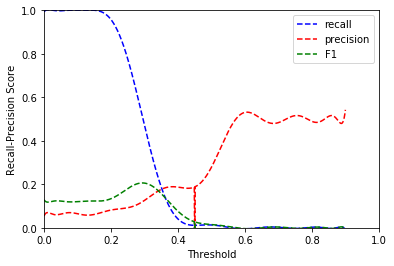

In [197]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score
recall_pack = []
precision_pack = []
threshold_pack = []
Fone_pack = []
for i in np.linspace(0,0.9,1000):
    y_pred_new = [1 * (x>=i) for x in probs]
    recall_pack += [recall_score(base_test_output.iloc[:,5], y_pred_new)]
    precision_pack += [precision_score(base_test_output.iloc[:,5], y_pred_new)]
    Fone_pack += [f1_score(base_test_output.iloc[:,5], y_pred_new)]
    threshold_pack += [i]
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

recall_smooth = savgol_filter(recall_pack, 999, 15)
precision_smooth = savgol_filter(precision_pack, 999, 15)
Fone_smooth = savgol_filter(Fone_pack, 999, 15)
plt.plot(threshold_pack, recall_smooth, "b--", label="recall")
plt.plot(threshold_pack, precision_smooth, "r--", label="precision")
plt.plot(threshold_pack, Fone_smooth, "g--", label="F1")
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Recall-Precision Score')
plt.xlabel('Threshold')
plt.show()

You can also choose the recall and precision score based on threshold value. You can select the model performance with high recall and low precision, or vice versa. it's up to you to decide

# Recommendation

for this assessment,
- The data is to good to be true (no null value?)
- some numbers does'nt make sense (e.g. didn't receive the principle, but able to pay the full amount of loan?)
- no unique identifier which represent borrower

dataset improvement,
- we can add external dataset related to region data (e.g. demographic data, property value, money relative value, crime rate,).
- for personal loan purpose (not for company), we should personal datas (e.g. education degree, age, mobile meta data).